In [1]:
# Import pandas to create DataFrame 
import pandas as pd 
  
# Make DataFrame of the given data 
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 

In [2]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


In [4]:
#Variance Threshold
#Feature selector that removes all low-variance features.

#This feature selection algorithm looks only at the features (X), not the desired outputs (y), 
#and can thus be used for unsupervised learning.

In [5]:
from sklearn.feature_selection import VarianceThreshold
var_thre=VarianceThreshold(threshold=0)
var_thre.fit(data)

VarianceThreshold(threshold=0)

In [6]:
#threshold 0 means the thats columns thay have  zero variance

In [7]:
var_thre.get_support()

array([ True,  True, False, False])

In [8]:
data.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
data.columns[var_thre.get_support()]


Index(['A', 'B'], dtype='object')

In [10]:
constant_columns=[column for column in data.columns
                 if column not in data.columns[var_thre.get_support()]]
print(len(constant_columns))

2


In [11]:
for feature in constant_columns:
    print(feature)

C
D


In [12]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv('train5.csv')

In [15]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [16]:
df.shape

(76020, 371)

In [17]:
x=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [18]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape 

((53214, 370), (22806, 370))

# Lets apply the variance threshold

In [19]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [20]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
### Finding non constant features
sum(var_thres.get_support())

332

In [22]:
# Lets Find non-constant features 
len(x_train.columns[var_thres.get_support()])

332

In [23]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

38


In [24]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
delta_imp_reemb_var33_1y3
delta_num_reemb_var33_1y3
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_reemb_var33_ult1
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [25]:
x_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7526,15083,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
51929,103706,2,48,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,451931.220000
46677,93351,2,40,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41225.670000
46194,92424,2,83,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
20190,40437,2,79,0.0,535.41,535.41,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153477.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,42533,53,46,0.0,1770.48,2669.46,451.74,808.77,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124242.570000
45891,91801,2,29,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34968.270000
42613,85345,9,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69090.870000
43567,87270,2,30,60.0,72.48,95.64,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66354.510000


In [1]:
#day 2 feature selection


In [26]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [28]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [30]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [33]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [36]:
X_train.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


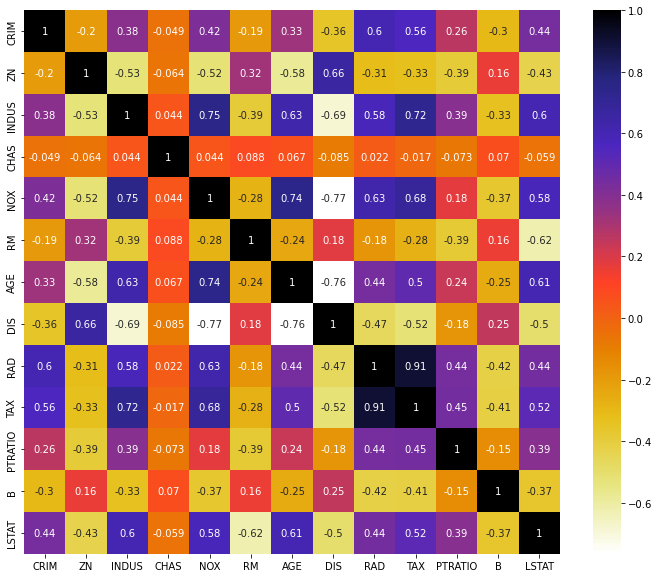

In [37]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [38]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [40]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [41]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,6.373,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
428,7.36711,0.0,18.10,0.0,6.193,24.0,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24.0,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4.0,18.4,396.90,4.54


In [42]:
df=pd.read_csv('train5.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

In [43]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<AxesSubplot:>

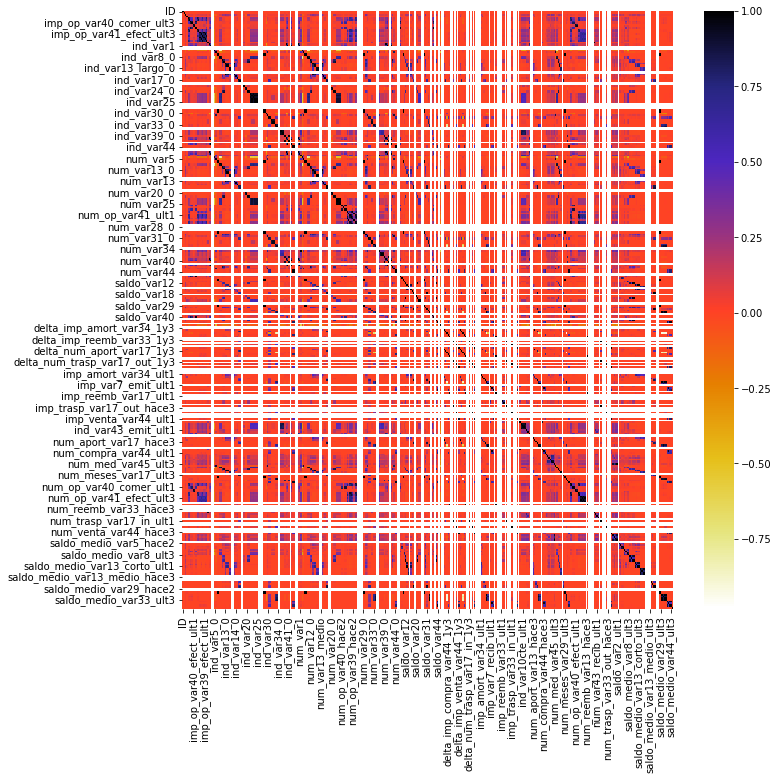

In [44]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat,cmap=plt.cm.CMRmap_r)

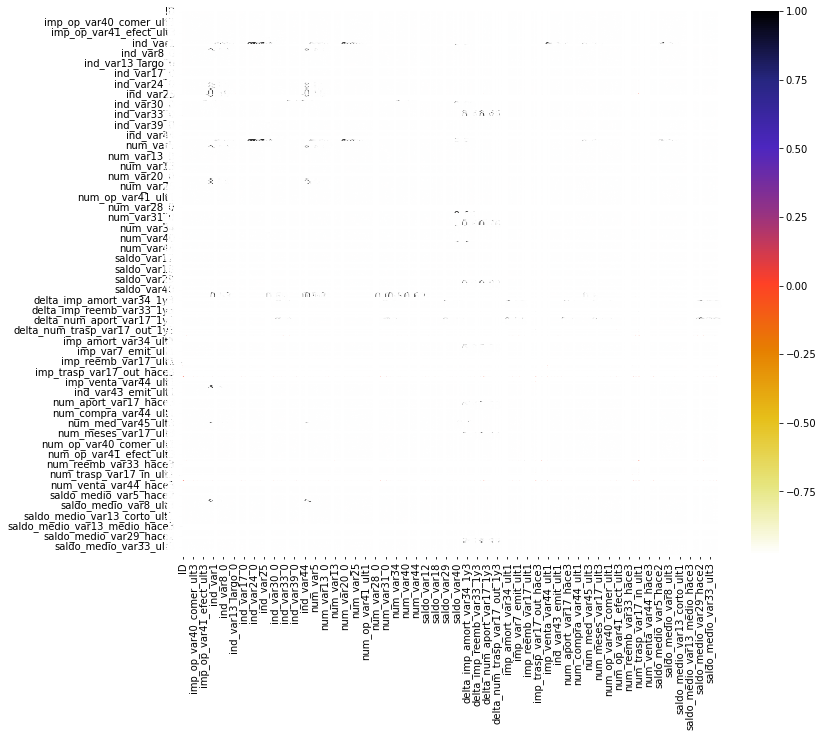

In [45]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [47]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [ ]:
X_train.drop(corr_features,axis=1)

In [ ]:
#day 3

In [1]:
"""Feature Selection-Information gain - mutual information In Classification Problem Statements
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency 
between the variables. It is equal to zero if and only if two random variables are independent, and higher values 
mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable 
given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for
X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA"""

'Feature Selection-Information gain - mutual information In Classification Problem Statements\nMutual Information\nMI Estimate mutual information for a discrete target variable.\n\nMutual information (MI) between two random variables is a non-negative value, which measures the dependency \nbetween the variables. It is equal to zero if and only if two random variables are independent, and higher values \nmean higher dependency.\n\nThe function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.\n\nInshort\n\nA quantity called mutual information measures the amount of information one can obtain from one random variable \ngiven another.\n\nThe mutual information between two random variables X and Y can be stated formally as follows:\n\nI(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for\nX and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.\n\nYoutube Video

In [2]:
import pandas as pd
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [6]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [7]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42263355, 0.30554775, 0.16223057, 0.25583202, 0.15904869,
       0.47356913, 0.71691812, 0.14685521, 0.26673161, 0.62513377,
       0.55870646, 0.54171107, 0.53623352])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.716918
Color.int               0.625134
Hue                     0.558706
OD                      0.541711
Proline                 0.536234
Phenols                 0.473569
Alcohol                 0.422634
Malic.acid              0.305548
Proanth                 0.266732
Acl                     0.255832
Ash                     0.162231
Mg                      0.159049
Nonflavanoid.phenols    0.146855
dtype: float64

<AxesSubplot:>

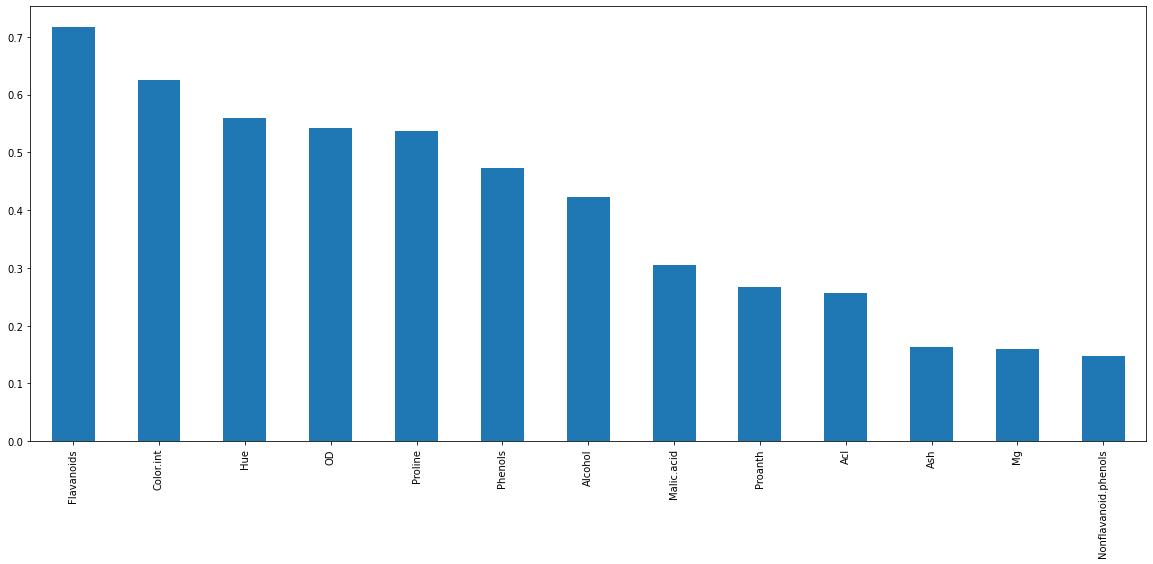

In [9]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [10]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [ ]:
"""Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically,
they calculate the same quantity if applied to the same data.

Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py"""

# feature scaling day 4

In [ ]:
"""Feature Selection-Information gain - mutual information In Regression Problem Statements
Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures
the dependency between the variables. It is equal to zero if and only if two random variables are independent, 
and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable
given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random 
variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for
X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI"""

In [11]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
housing_df=pd.read_csv('train_10.csv')

In [12]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
housing_df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [28]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [29]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [30]:
housing_df=housing_df[numerical_cols]

In [31]:
housing_df.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [32]:
housing_df=housing_df.drop("Id",axis=1)

In [33]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_df.drop(labels=['SalePrice'], axis=1),
    housing_df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [34]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [ ]:
X_train.isnull().sum()

In [35]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25415341, 0.21555344, 0.16768902, 0.52596838, 0.10402755,
       0.34529792, 0.24329501, 0.09532477, 0.16226748, 0.0172049 ,
       0.11388505, 0.38170538, 0.3136708 , 0.22098528, 0.00589332,
       0.47990946, 0.03059139, 0.        , 0.28335644, 0.07866842,
       0.03869735, 0.01886022, 0.19267381, 0.18489605, 0.2694193 ,
       0.37062122, 0.36560009, 0.06597334, 0.17310907, 0.00849268,
       0.00428026, 0.01437609, 0.00262169, 0.        , 0.        ,
       0.01379686])

In [36]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.525968
GrLivArea        0.479909
TotalBsmtSF      0.381705
GarageCars       0.370621
GarageArea       0.365600
YearBuilt        0.345298
1stFlrSF         0.313671
FullBath         0.283356
GarageYrBlt      0.269419
MSSubClass       0.254153
YearRemodAdd     0.243295
2ndFlrSF         0.220985
LotFrontage      0.215553
TotRmsAbvGrd     0.192674
Fireplaces       0.184896
OpenPorchSF      0.173109
LotArea          0.167689
BsmtFinSF1       0.162267
BsmtUnfSF        0.113885
OverallCond      0.104028
MasVnrArea       0.095325
HalfBath         0.078668
WoodDeckSF       0.065973
BedroomAbvGr     0.038697
BsmtFullBath     0.030591
KitchenAbvGr     0.018860
BsmtFinSF2       0.017205
ScreenPorch      0.014376
YrSold           0.013797
EnclosedPorch    0.008493
LowQualFinSF     0.005893
3SsnPorch        0.004280
PoolArea         0.002622
BsmtHalfBath     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

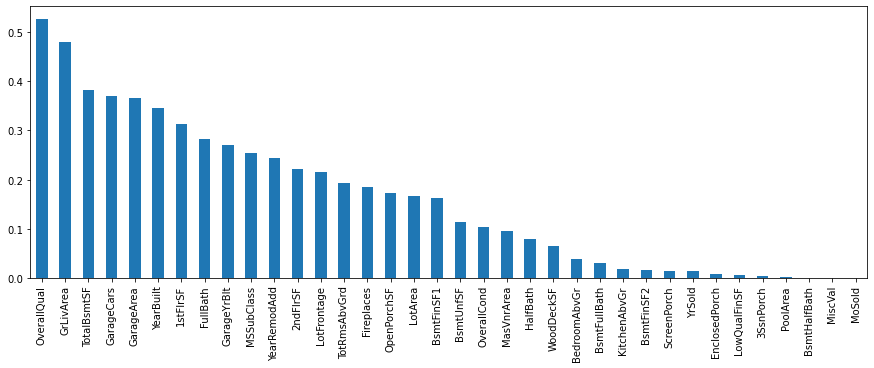

In [37]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [38]:
from sklearn.feature_selection import SelectPercentile

In [39]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002308FE2F280>)

In [40]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [41]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# day 5

In [42]:
"""Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task.
This score can be used to select the n_features features with the highest values for the test chi-squared statistic
from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in
document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function 
“weeds out” the features that are the most likely to be independent of class and therefore irrelevant
for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories
of the feature, against the expected distribution of the target classes, regardless of the feature categories.

Youtube Videos
Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI"""

'Fisher Score- Chisquare Test For Feature Selection\nCompute chi-squared stats between each non-negative feature and class.\n\nThis score should be used to evaluate categorical variables in a classification task.\nThis score can be used to select the n_features features with the highest values for the test chi-squared statistic\nfrom X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in\ndocument classification), relative to the classes.\n\nRecall that the chi-square test measures dependence between stochastic variables, so using this function \n“weeds out” the features that are the most likely to be independent of class and therefore irrelevant\nfor classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.\n\nIt compares the observed distribution of the different classes of target Y among the different categories\nof the feature, against the expected distribution of the target cla

In [43]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [44]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [46]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [49]:
import numpy as np
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [50]:
### Let's perform label encoding on sex column
import numpy as np
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [61]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [51]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [52]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [53]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [54]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [55]:
X_train['sex'].unique()

array([1, 0])

In [56]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [57]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [62]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [58]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [59]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

In [60]:
#Observation
#Sex Column is the most important column when compared to the output feature Survived 

# #day 7

In [1]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
#Univariate Selection
X=df.iloc[:,:-1]
y=df['price_range']

In [3]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [4]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [6]:
print(model.feature_importances_)

[0.06057953 0.0199957  0.03344709 0.02060171 0.03261433 0.01777915
 0.03455346 0.03403409 0.03701529 0.03335868 0.03448188 0.04726496
 0.04847648 0.38827142 0.03332171 0.03440461 0.03502179 0.0144179
 0.0198985  0.02046171]


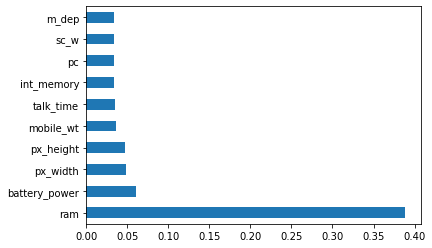

In [7]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# t test

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [2]:
len(ages)



32

In [3]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [4]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [5]:
age_sample

array([24, 18, 55, 50, 14, 14, 55, 17, 40, 43])

In [6]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30)
print(p_value)

0.5965322327390659


In [7]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)
classA_ages.mean()

46.9

In [10]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [11]:
p_value

1.139027071016194e-13

In [12]:
school_ages.mean()

53.303333333333335

In [13]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [20]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[23.97614363 26.85249356 24.1373696  27.16615209 32.74902935 37.51232196
 18.81017209 33.31296285 30.20472761 25.47138779 21.60004812 34.32284878
 36.99043308 30.7551601  40.64860465]


In [21]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [22]:
weight_df

,weight_10,weight_20,weight_change
0,25,23.976144,-1.023856
1,30,26.852494,-3.147506
2,28,24.137370,-3.862630
3,35,27.166152,-7.833848
4,28,32.749029,4.749029
5,34,37.512322,3.512322
6,26,18.810172,-7.189828
7,29,33.312963,4.312963
8,30,30.204728,0.204728
9,26,25.471388,-0.528612


In [23]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)
print(p_value)

0.4858219692122552


In [24]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis
